In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
file_path = "top_50_books.csv"
df = pd.read_csv(file_path)

In [7]:
(df.head())
("Розміри датасету:", df.shape)
(f"Відповідь: Датасет зберігає дані про {df.shape[0]} книг.")

'Відповідь: Датасет зберігає дані про 550 книг.'

In [9]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
("Нові назви колонок:", df.columns)

('Нові назви колонок:',
 Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object'))

In [10]:
missing_data = df.isna().sum()
("Кількість пропусків у кожному стовпці:")
(missing_data)
("Відповідь:", "Так" if missing_data.sum() > 0 else "Ні")

('Відповідь:', 'Ні')

In [11]:
unique_genres = df['genre'].unique()
("Унікальні жанри:", unique_genres)
("Відповідь:", unique_genres)

('Відповідь:', array(['Non Fiction', 'Fiction'], dtype=object))

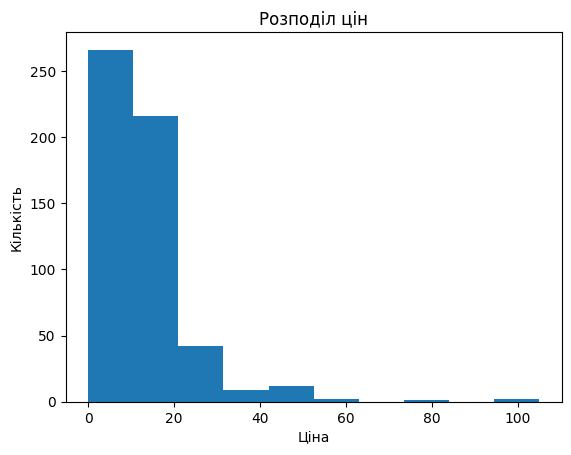

'Відповідь: Медіанна ціна: 11.0'

In [12]:
df['price'].plot(kind='hist', bins=10, title='Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Кількість')
plt.show()

max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

(f"Відповідь: Максимальна ціна: {max_price}")
(f"Відповідь: Мінімальна ціна: {min_price}")
(f"Відповідь: Середня ціна: {mean_price:.2f}")
(f"Відповідь: Медіанна ціна: {median_price}")

In [13]:
highest_rating = df['user_rating'].max()
books_with_highest_rating = df[df['user_rating'] == highest_rating]
("Книги з найвищим рейтингом:")
(books_with_highest_rating)

(f"Відповідь: {highest_rating}")

(f"Відповідь: {books_with_highest_rating.shape[0]}")

most_reviews = df['reviews'].max()
book_most_reviews = df[df['reviews'] == most_reviews]
("Книга з найбільшою кількістю відгуків:")
(book_most_reviews)

(f"Відповідь: {book_most_reviews['name'].iloc[0]}")

most_expensive_2015 = df[df['year'] == 2015].sort_values('price', ascending=False).iloc[0]
("Найдорожча книга 2015 року:")
(most_expensive_2015)

(f"Відповідь: {most_expensive_2015['name']}")

fiction_2010 = df[(df['genre'] == 'Fiction') & (df['year'] == 2010)]
("Кількість книг жанру Fiction у 2010 році:", fiction_2010.shape[0])

(f"Відповідь: {fiction_2010.shape[0]}")

books_4_9 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
("Книги з рейтингом 4.9 у 2010 та 2011 роках:")
(books_4_9)

(f"Відповідь: {books_4_9.shape[0]}")

'Відповідь: 1'

In [14]:
price_stats = df.groupby('genre')['price'].agg(['min', 'max'])
("Статистика цін за жанрами:")
(price_stats)

(f"Максимальна ціна для Fiction: {price_stats.loc['Fiction', 'max']}")
(f"Мінімальна ціна для Fiction: {price_stats.loc['Fiction', 'min']}")
(f"Максимальна ціна для Non Fiction: {price_stats.loc['Non Fiction', 'max']}")
(f"Мінімальна ціна для Non Fiction: {price_stats.loc['Non Fiction', 'min']}")

'Мінімальна ціна для Non Fiction: 0'

In [15]:
author_books = df.groupby('author')['name'].count()
("Кількість книг для кожного автора:")
(author_books)

top_author = author_books.idxmax()
(f"Автор із найбільшою кількістю книг: {top_author}")
(f"Кількість книг цього автора: {author_books.max()}")

author_avg_rating = df.groupby('author')['user_rating'].mean()
("Середній рейтинг для кожного автора:")
(author_avg_rating)

min_rating_author = author_avg_rating.idxmin()
(f"Автор із мінімальним рейтингом: {min_rating_author}")
(f"Середній рейтинг цього автора: {author_avg_rating.min()}")

'Середній рейтинг цього автора: 3.9'

In [16]:
authors_summary = pd.concat([author_books, author_avg_rating], axis=1)
authors_summary.columns = ['book_count', 'avg_rating']
("Об'єднана таблиця:")
(authors_summary)

sorted_authors = authors_summary.sort_values(by=['book_count', 'avg_rating'])
("Відсортовані автори:")
(sorted_authors)

(f"Перший автор у списку: {sorted_authors.index[0]}")

'Перший автор у списку: Muriel Barbery'